<a href="https://colab.research.google.com/github/Rod10nN/YOLO11/blob/master/YOLO11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Установка ultralytics

In [ ]:
!pip install ultralytics

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="KvsTvUh3QniAlTB4Yqba")
project = rf.workspace("yolo-3gsw1").project("drone-qp3p5-yladw")
version = project.version(1)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 13.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to drone-1 in yolov11:: 100%|██████████| 510/510 [00:00<00:00, 7255.55it/s]


In [ ]:
from ultralytics import YOLO

Обучение модели

In [ ]:
!yolo detect train data=/content/drone-1/data.yaml model=yolo11s.pt, epochs=30 imgsz=640

WARNING ⚠️ argument 'model=yolo11s.pt,' does not require trailing comma ',', updating to 'model=yolo11s.pt'.
Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/drone-1/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_f

###Сравнение предсказаний и истинных меток:

Истинные метки:

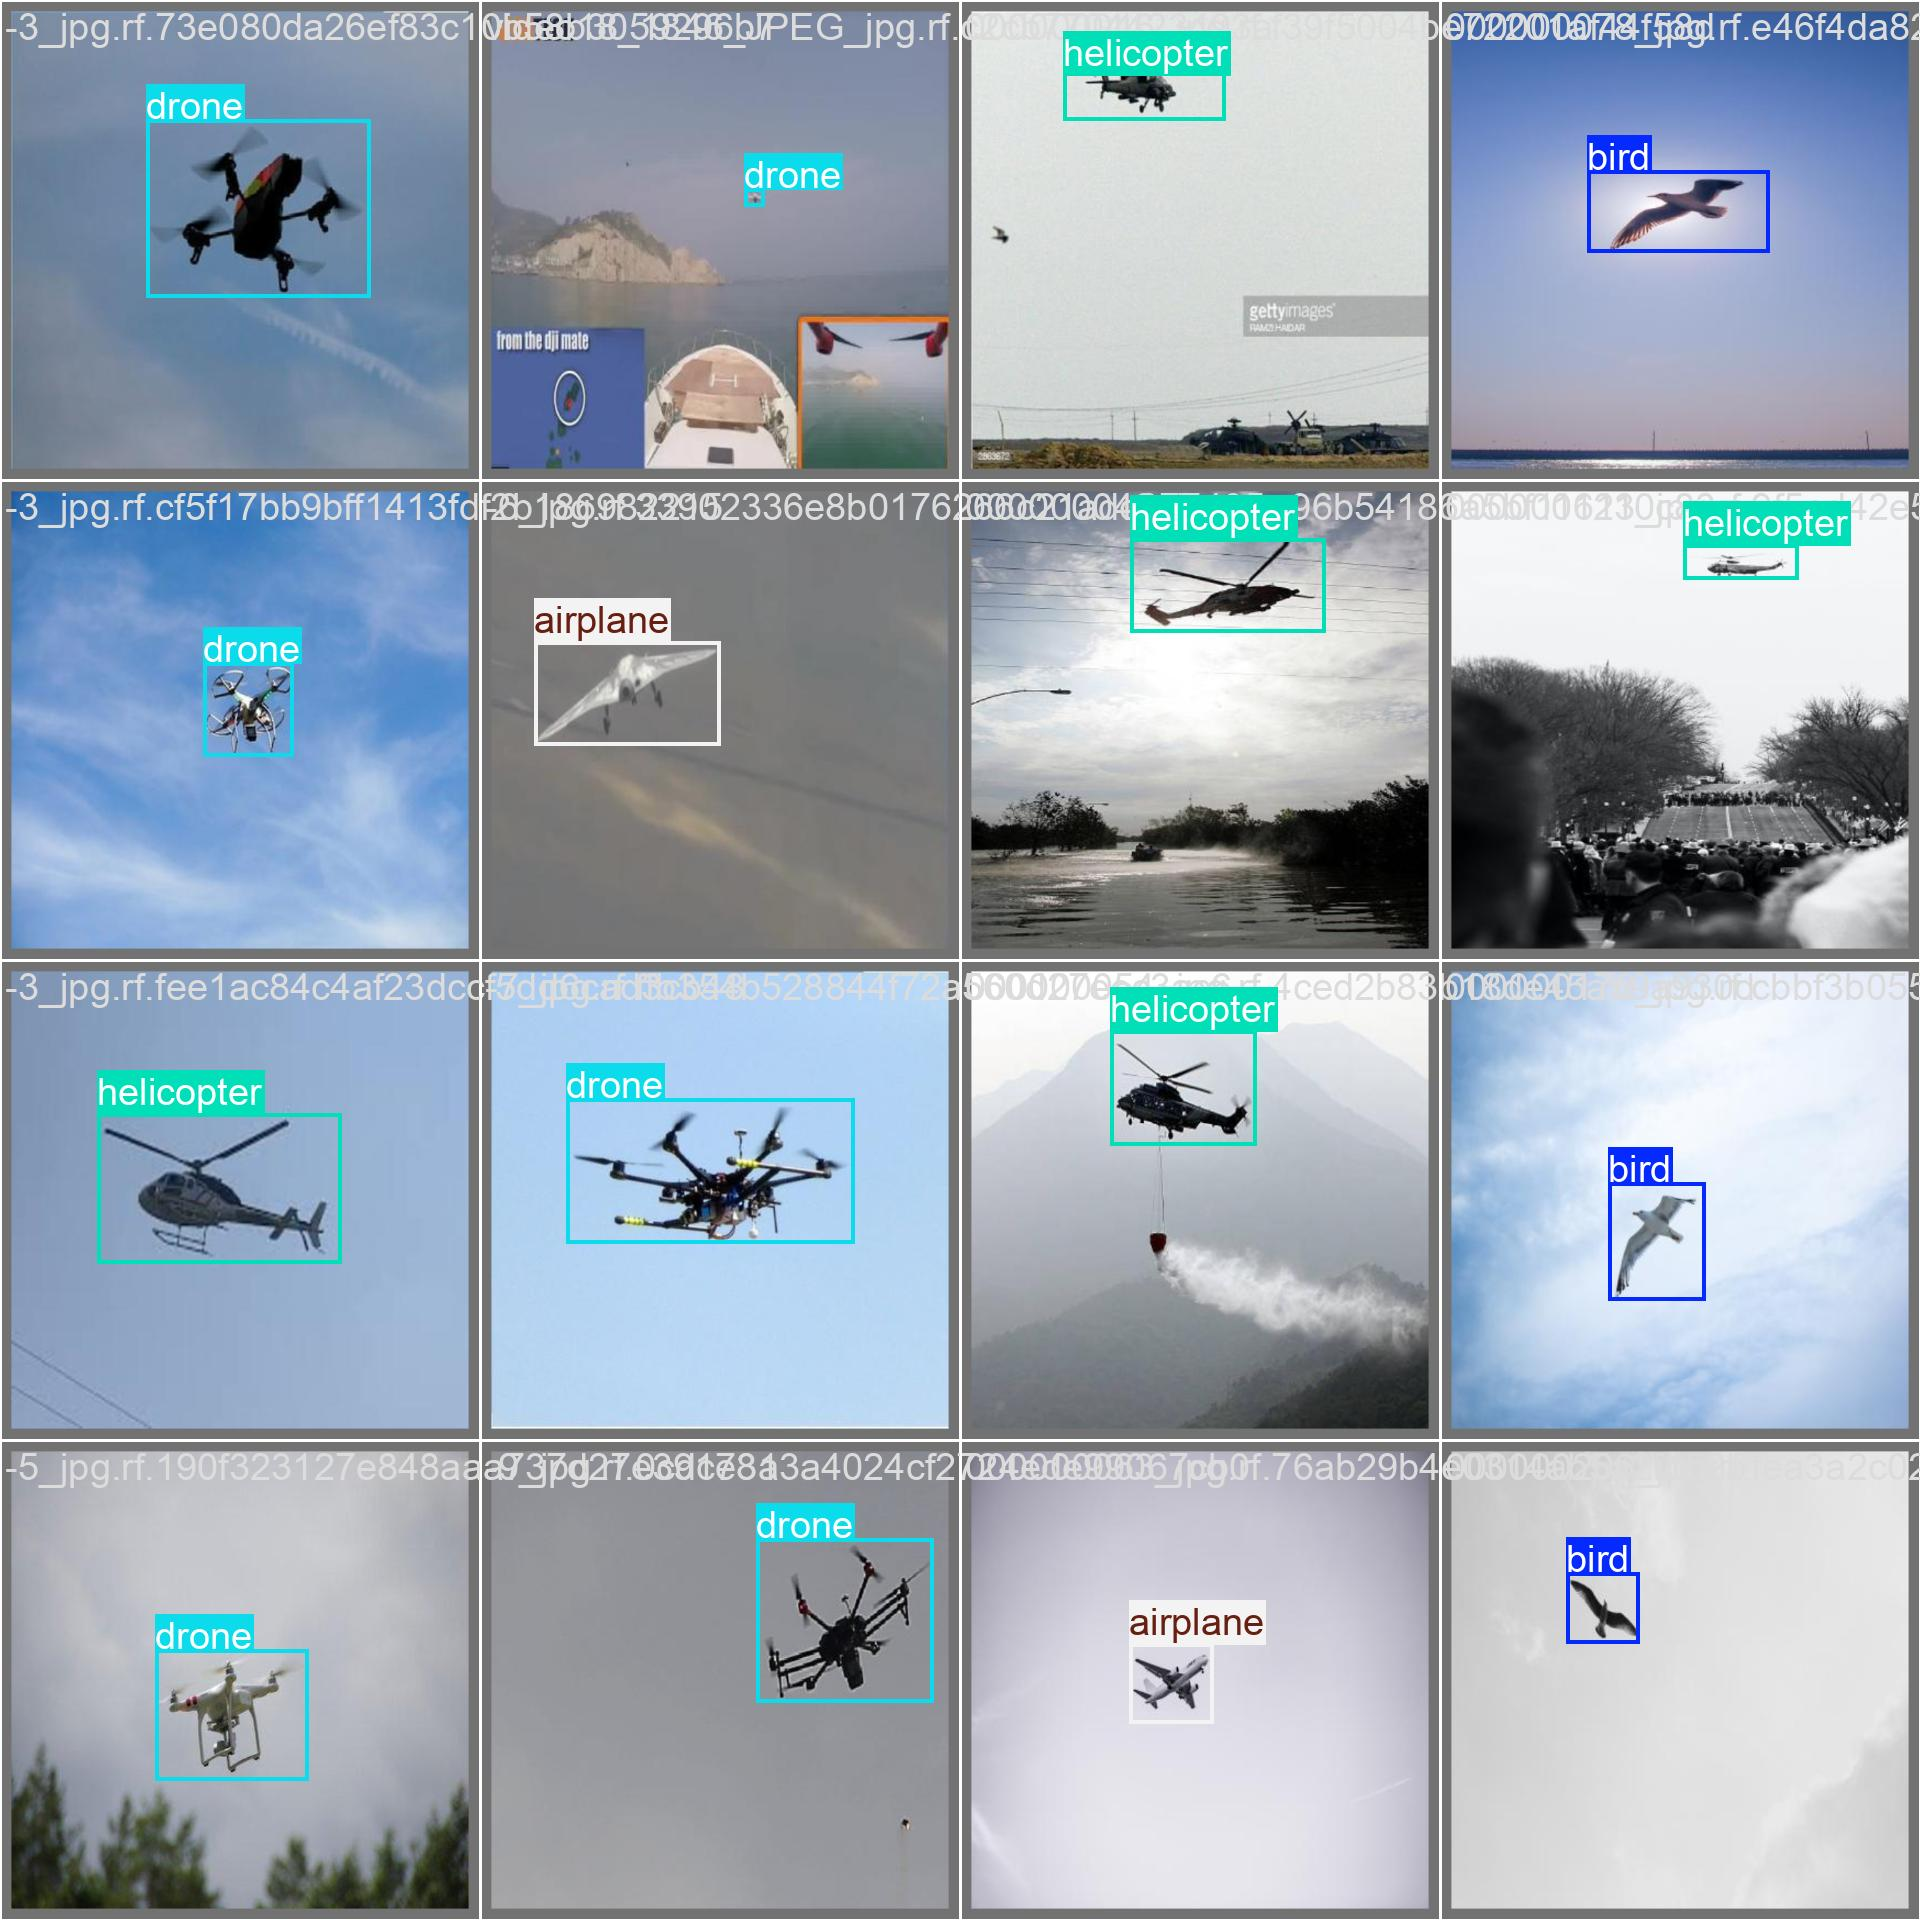

Предсказания на валидационном наборе:

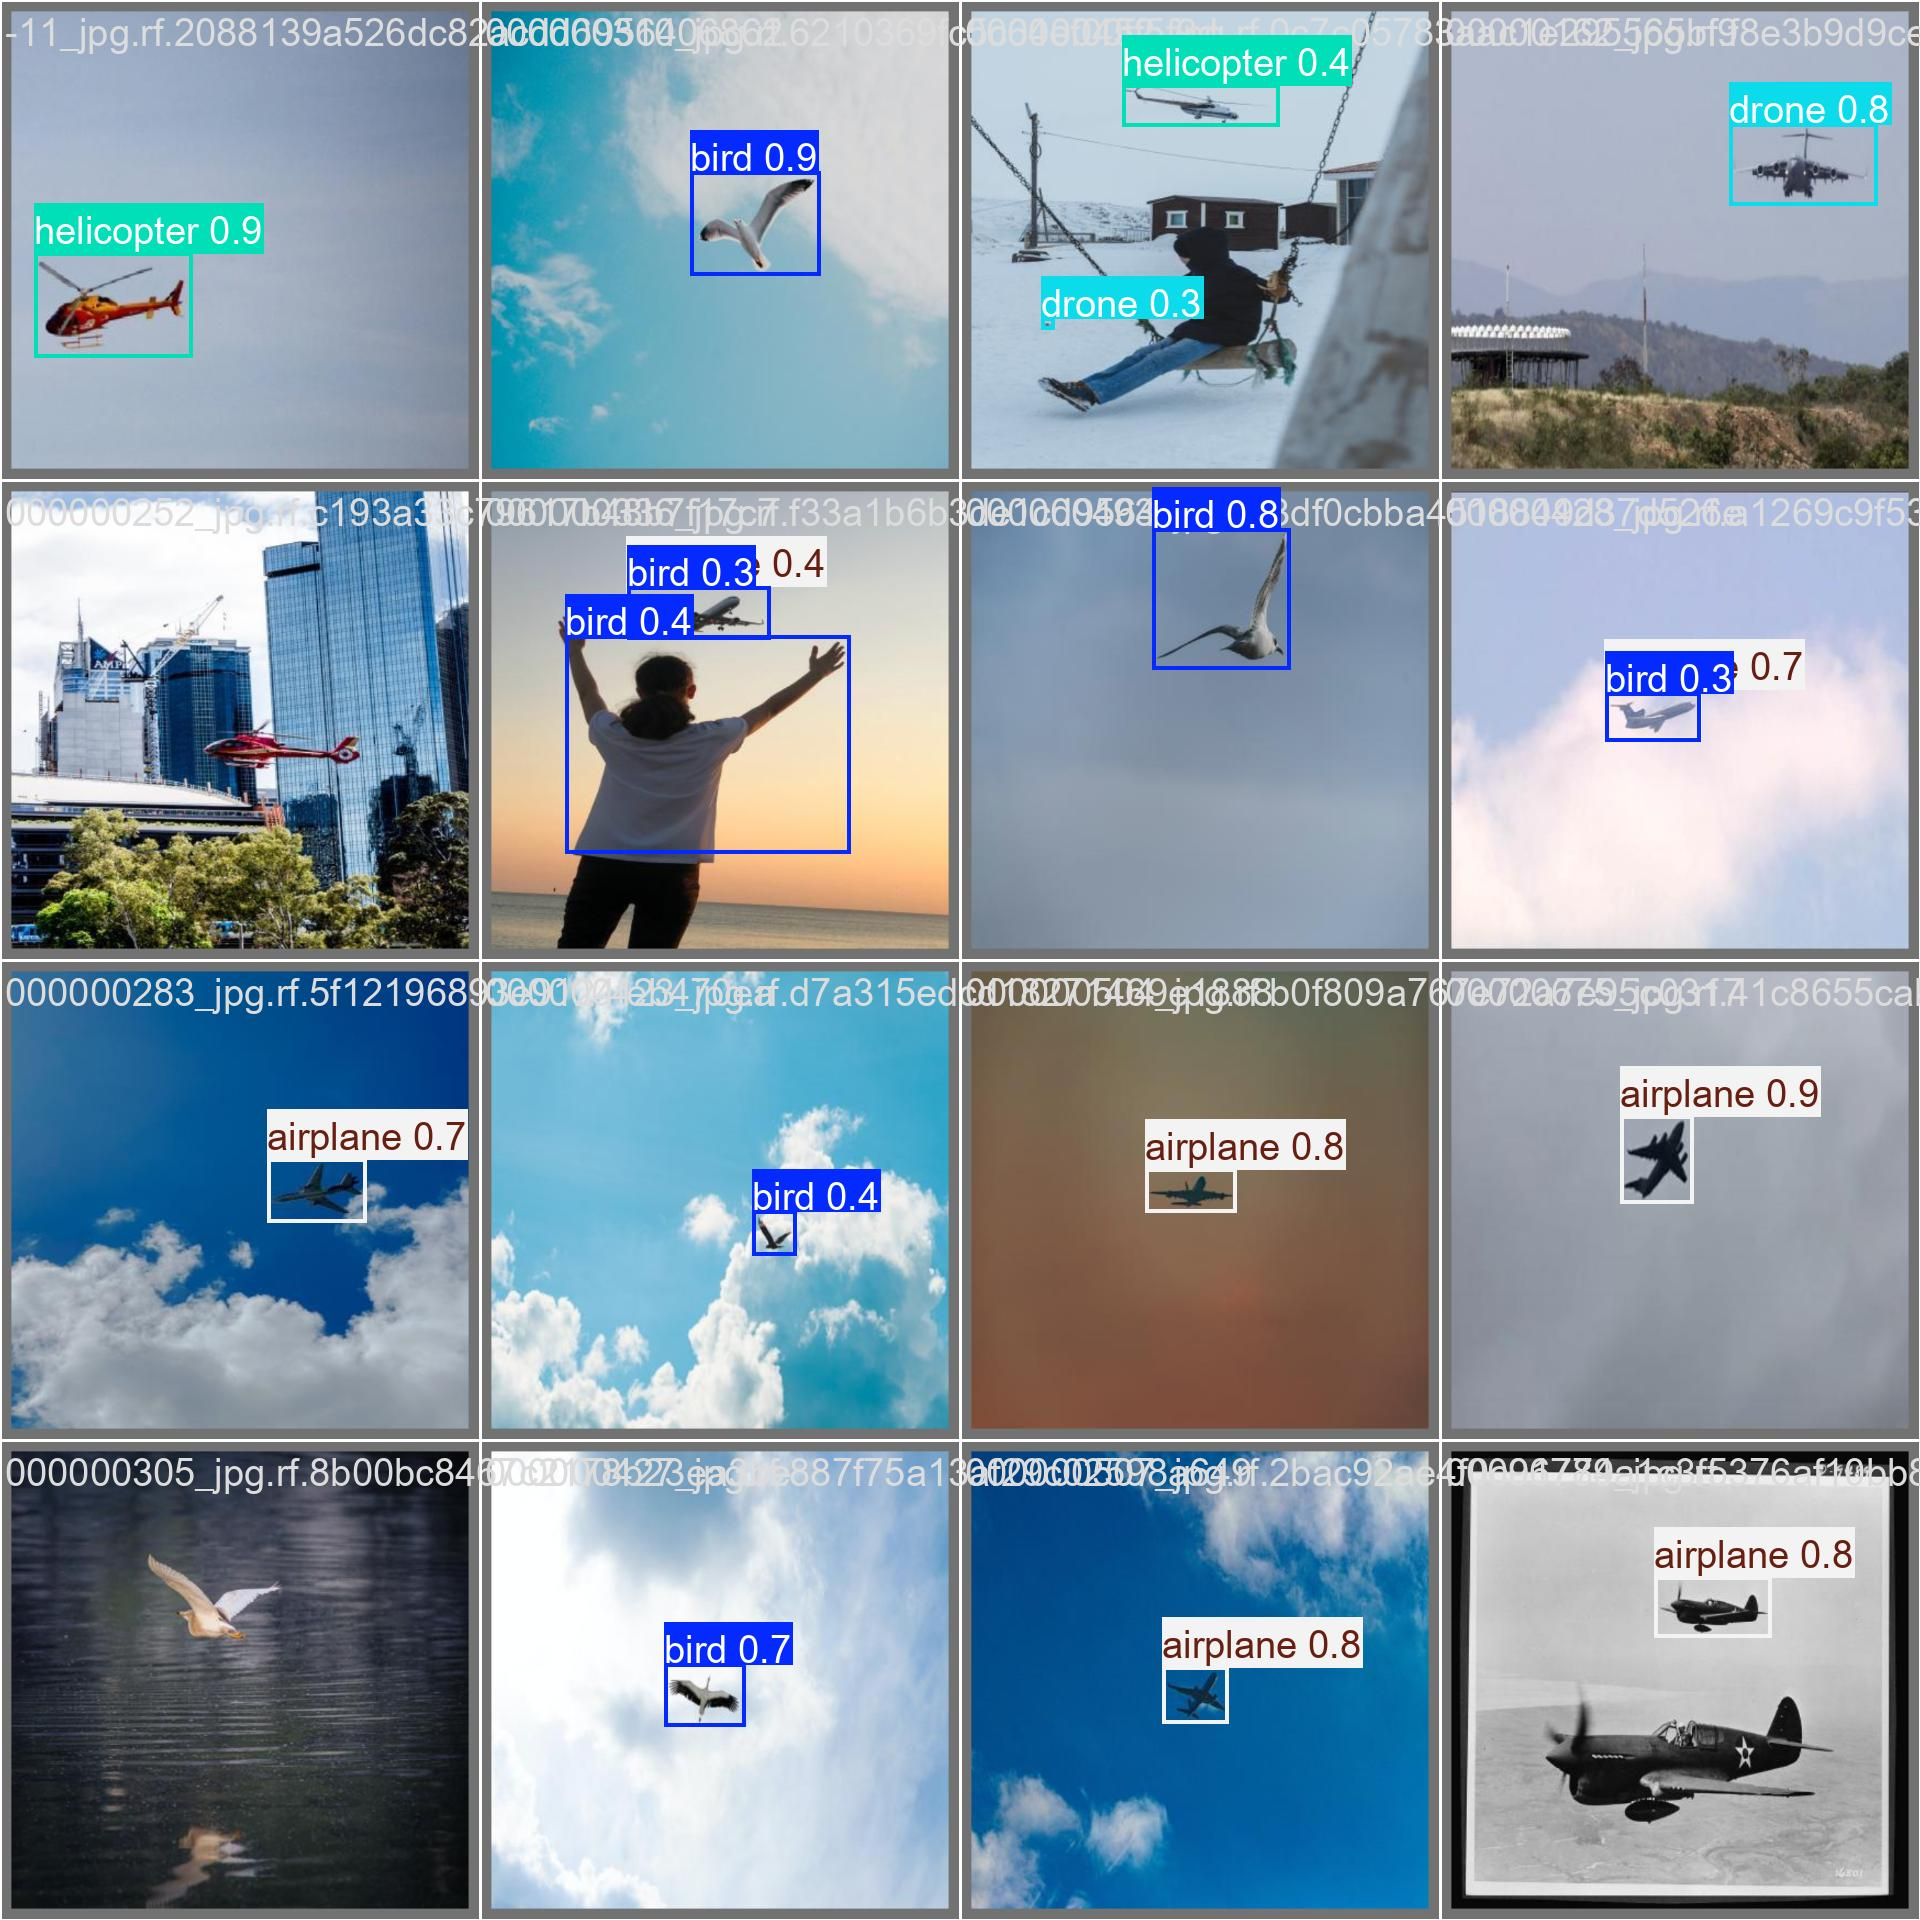

Истинные метки:

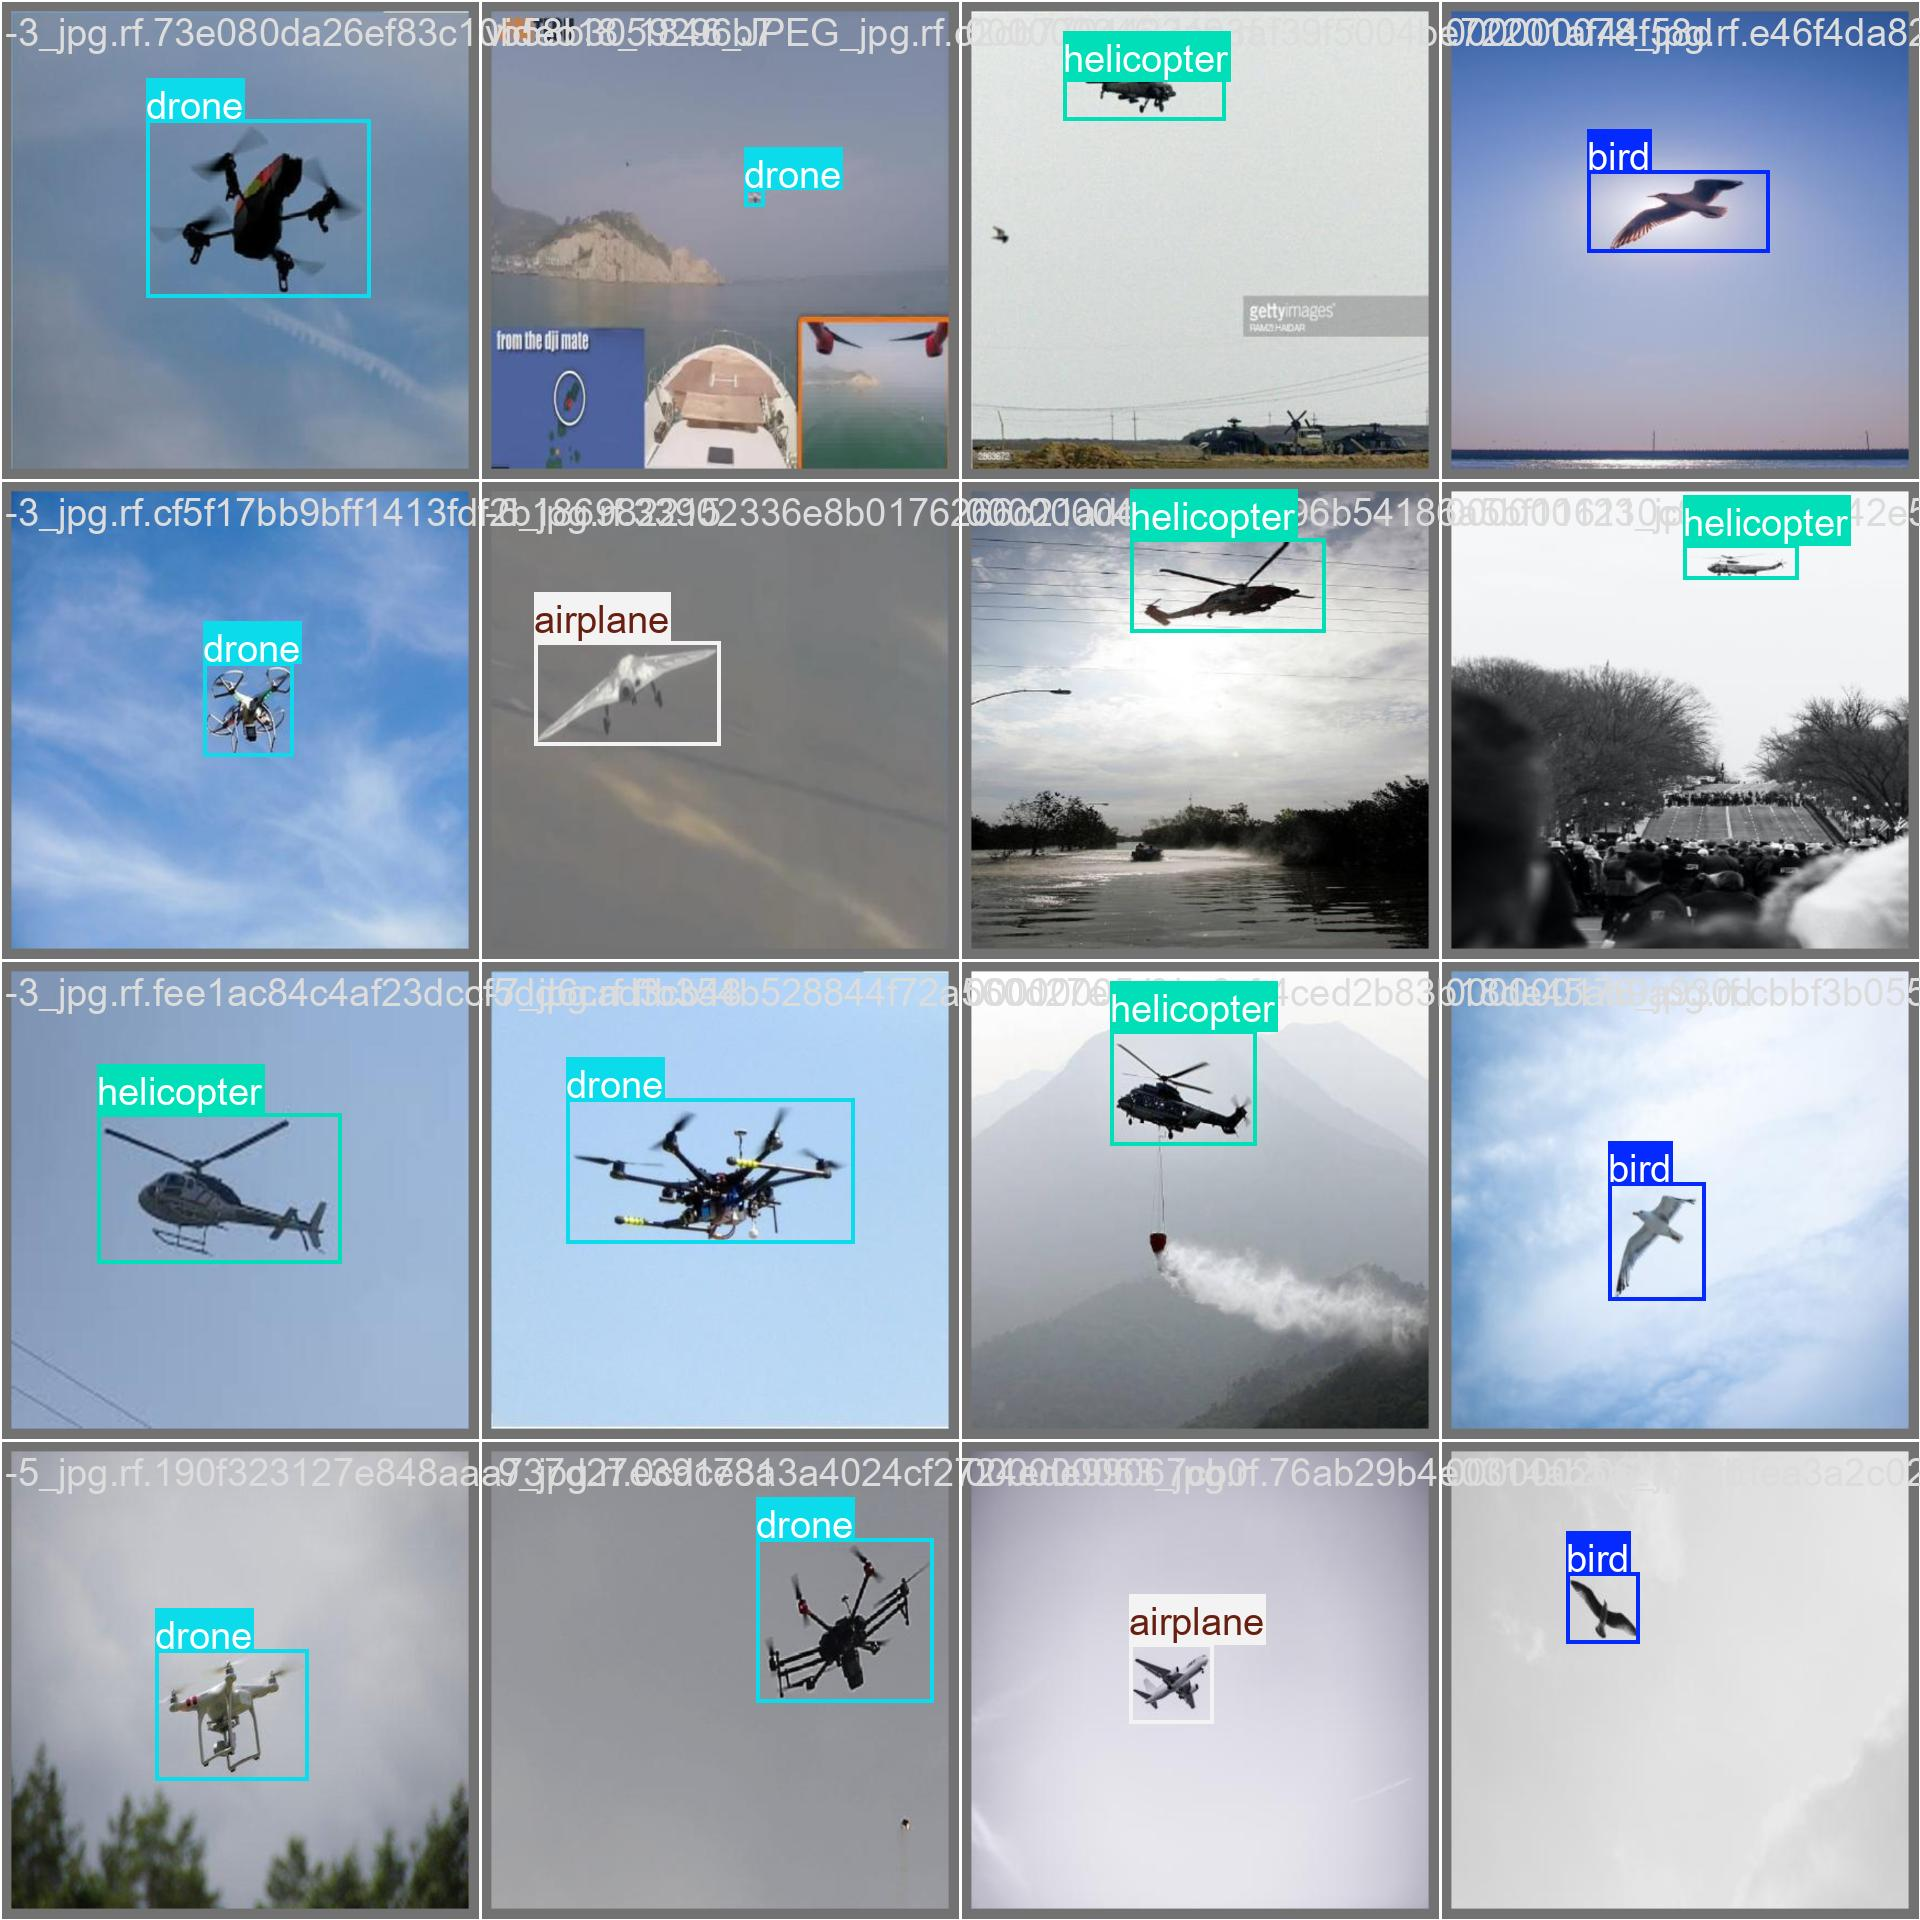

Предсказания на валидационном наборе:

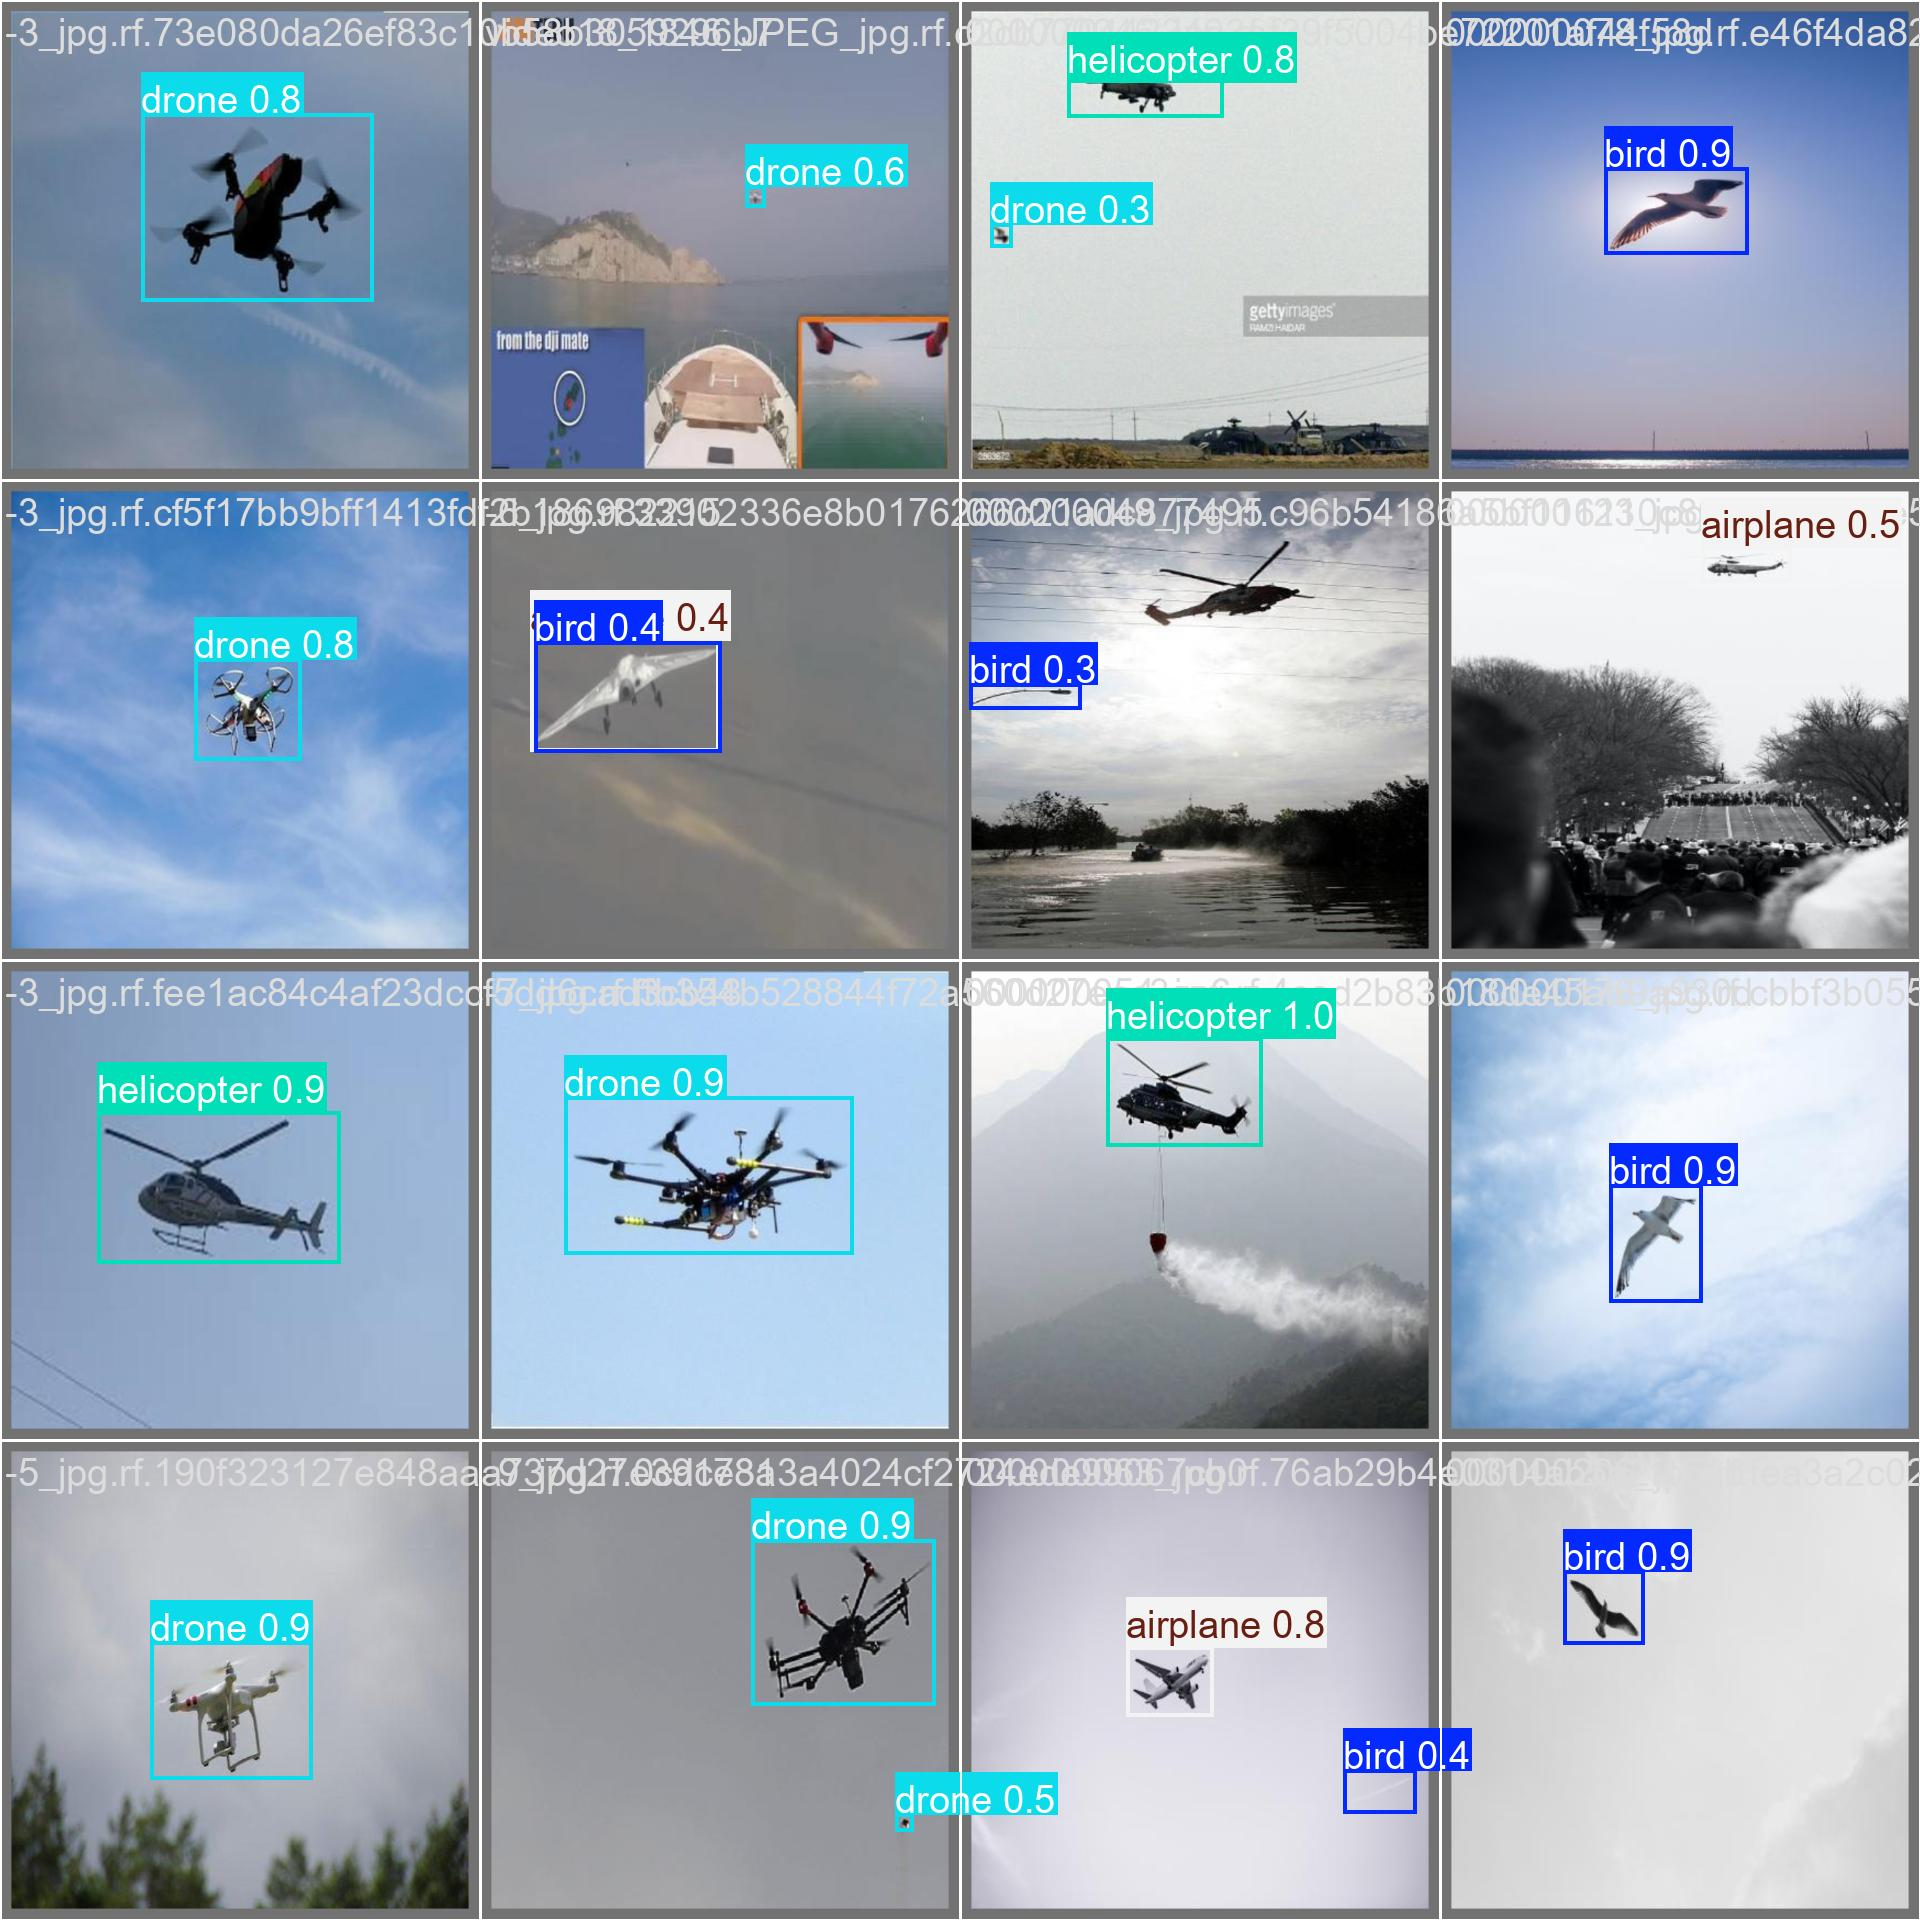

Значения метрик:

Кривая Precision-Recall:

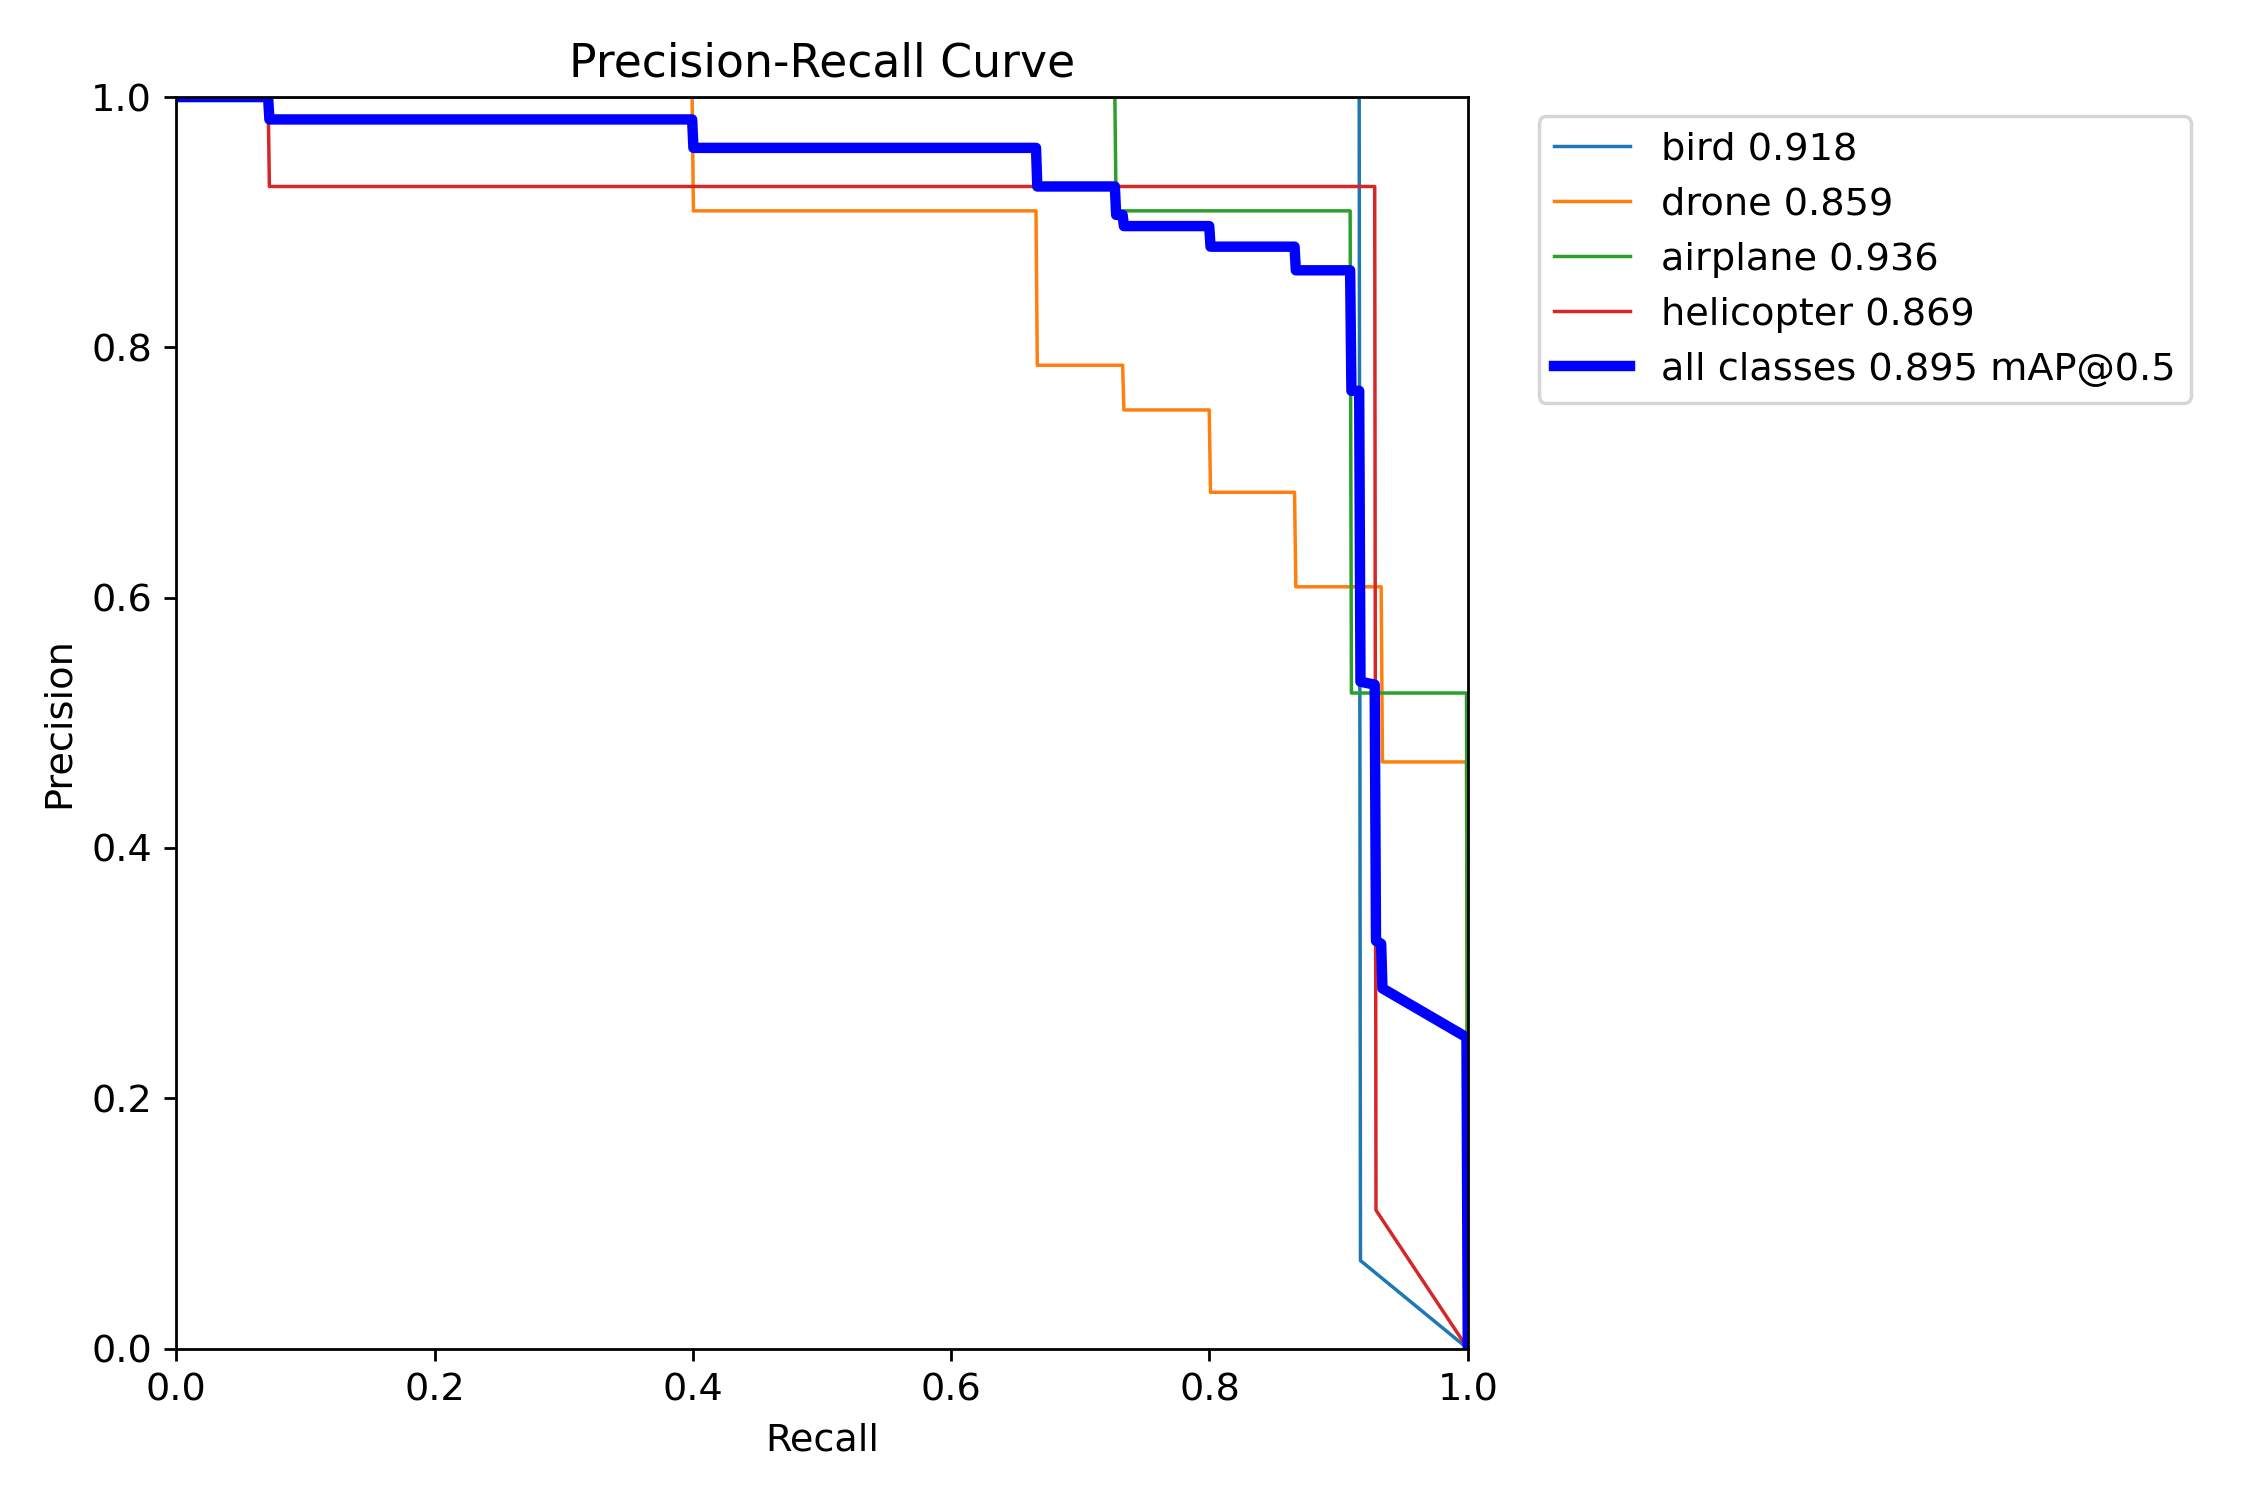

1. bird (Птица) 0.918:
   - Высокое значение mAP говорит о том, что модель имеет хорошую точность и полноту для объектов этого класса. Отметим, что это значение можно получить путем усреднения значений точности по разным порогам уверенности, что является основой для построения Precision-Recall кривой.

2. drone (Дрон) 0.859:
   - Это также хорошая точность, хотя она ниже, чем у класса "птицы". Это может указывать на то, что модель иногда неправильно идентифицирует дроны как другие классы (или пропускает их).

3. airplane (Самолет) 0.936:
   - Самая высокая точность среди представленных классов. Модель хорошо справляется с распознаванием самолетов, что подразумевает высокую точность и/или полноту.

4. helicopter (Вертолет) 0.869:
   - Это значение может указывать на то, что модель разумно справляется с детекцией вертолетов, но с некоторыми проблемами по сравнению с другими классами.

5. all classes 0.895 mAP@0.5:
   - Это общее значение mAP для всех классов. Оно показывает, что в целом модель показывает хорошую производительность

Кривая Recall-Confidence

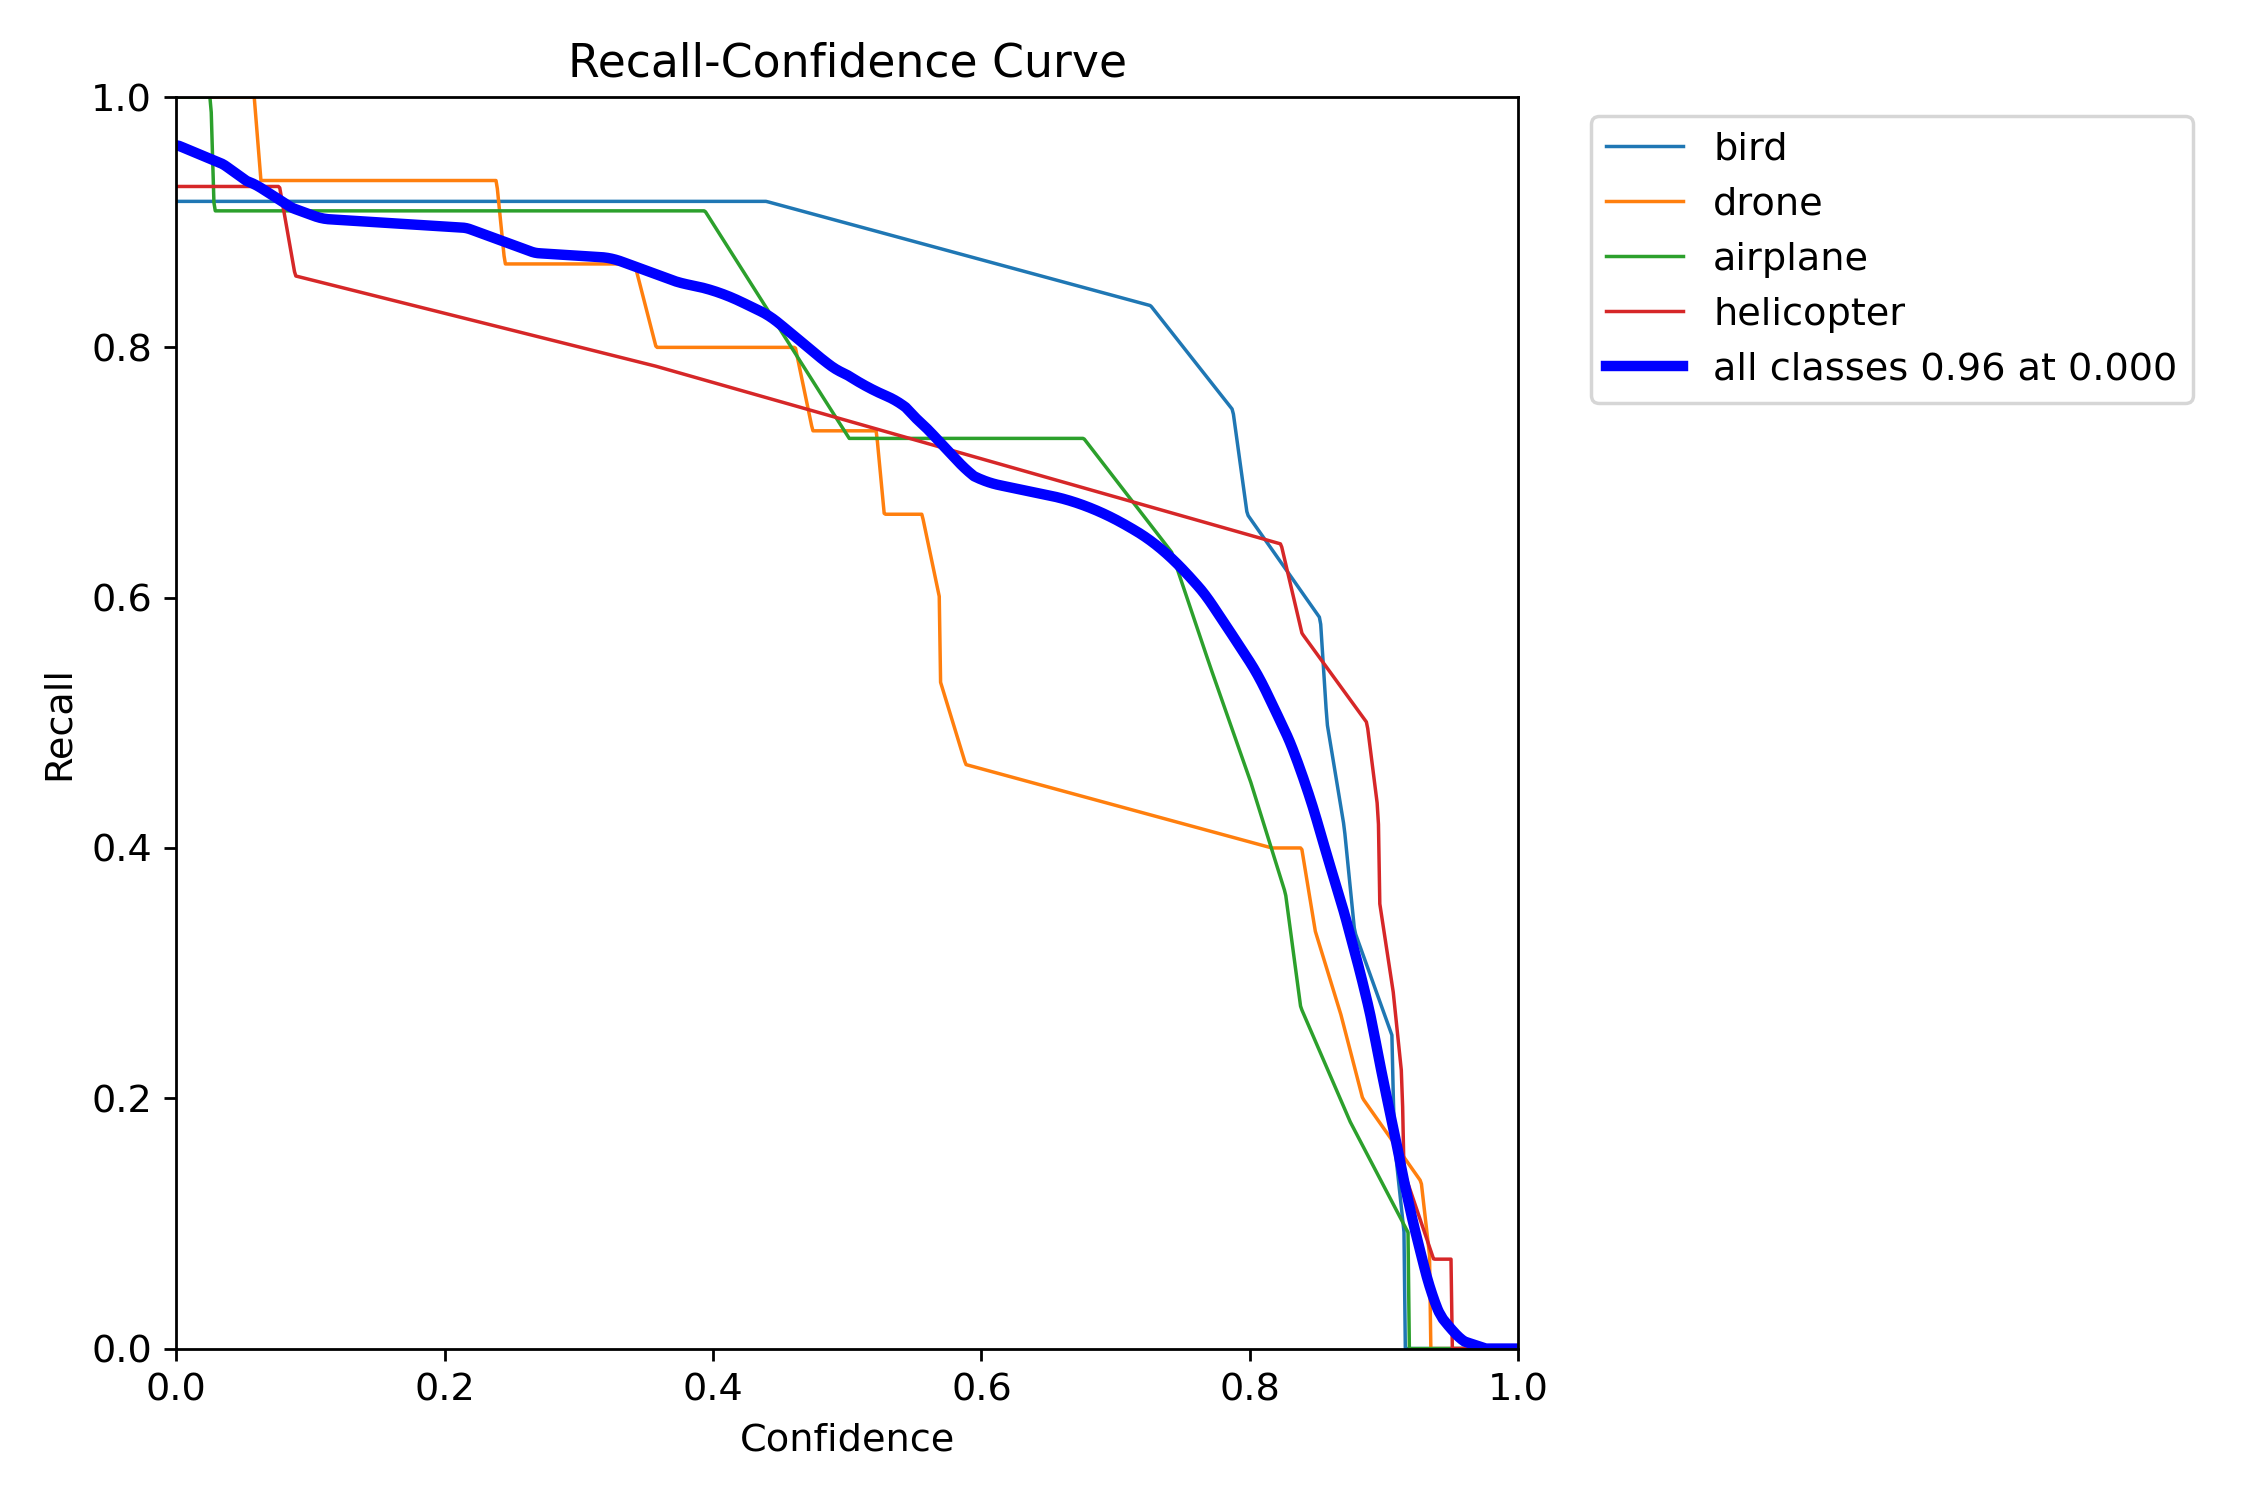

Для всех классов модель достигла полноты 0.96 при пороге уверенности, равном 0.000. Это указывает на то, что если использовать порог уверенности равный нулю, модель будет классифицировать практически все объекты как положительные (т.е. recall будет очень высоким, так как она обнаруживает почти все истинные положительные примеры).

Кривая Precision-Confidence:

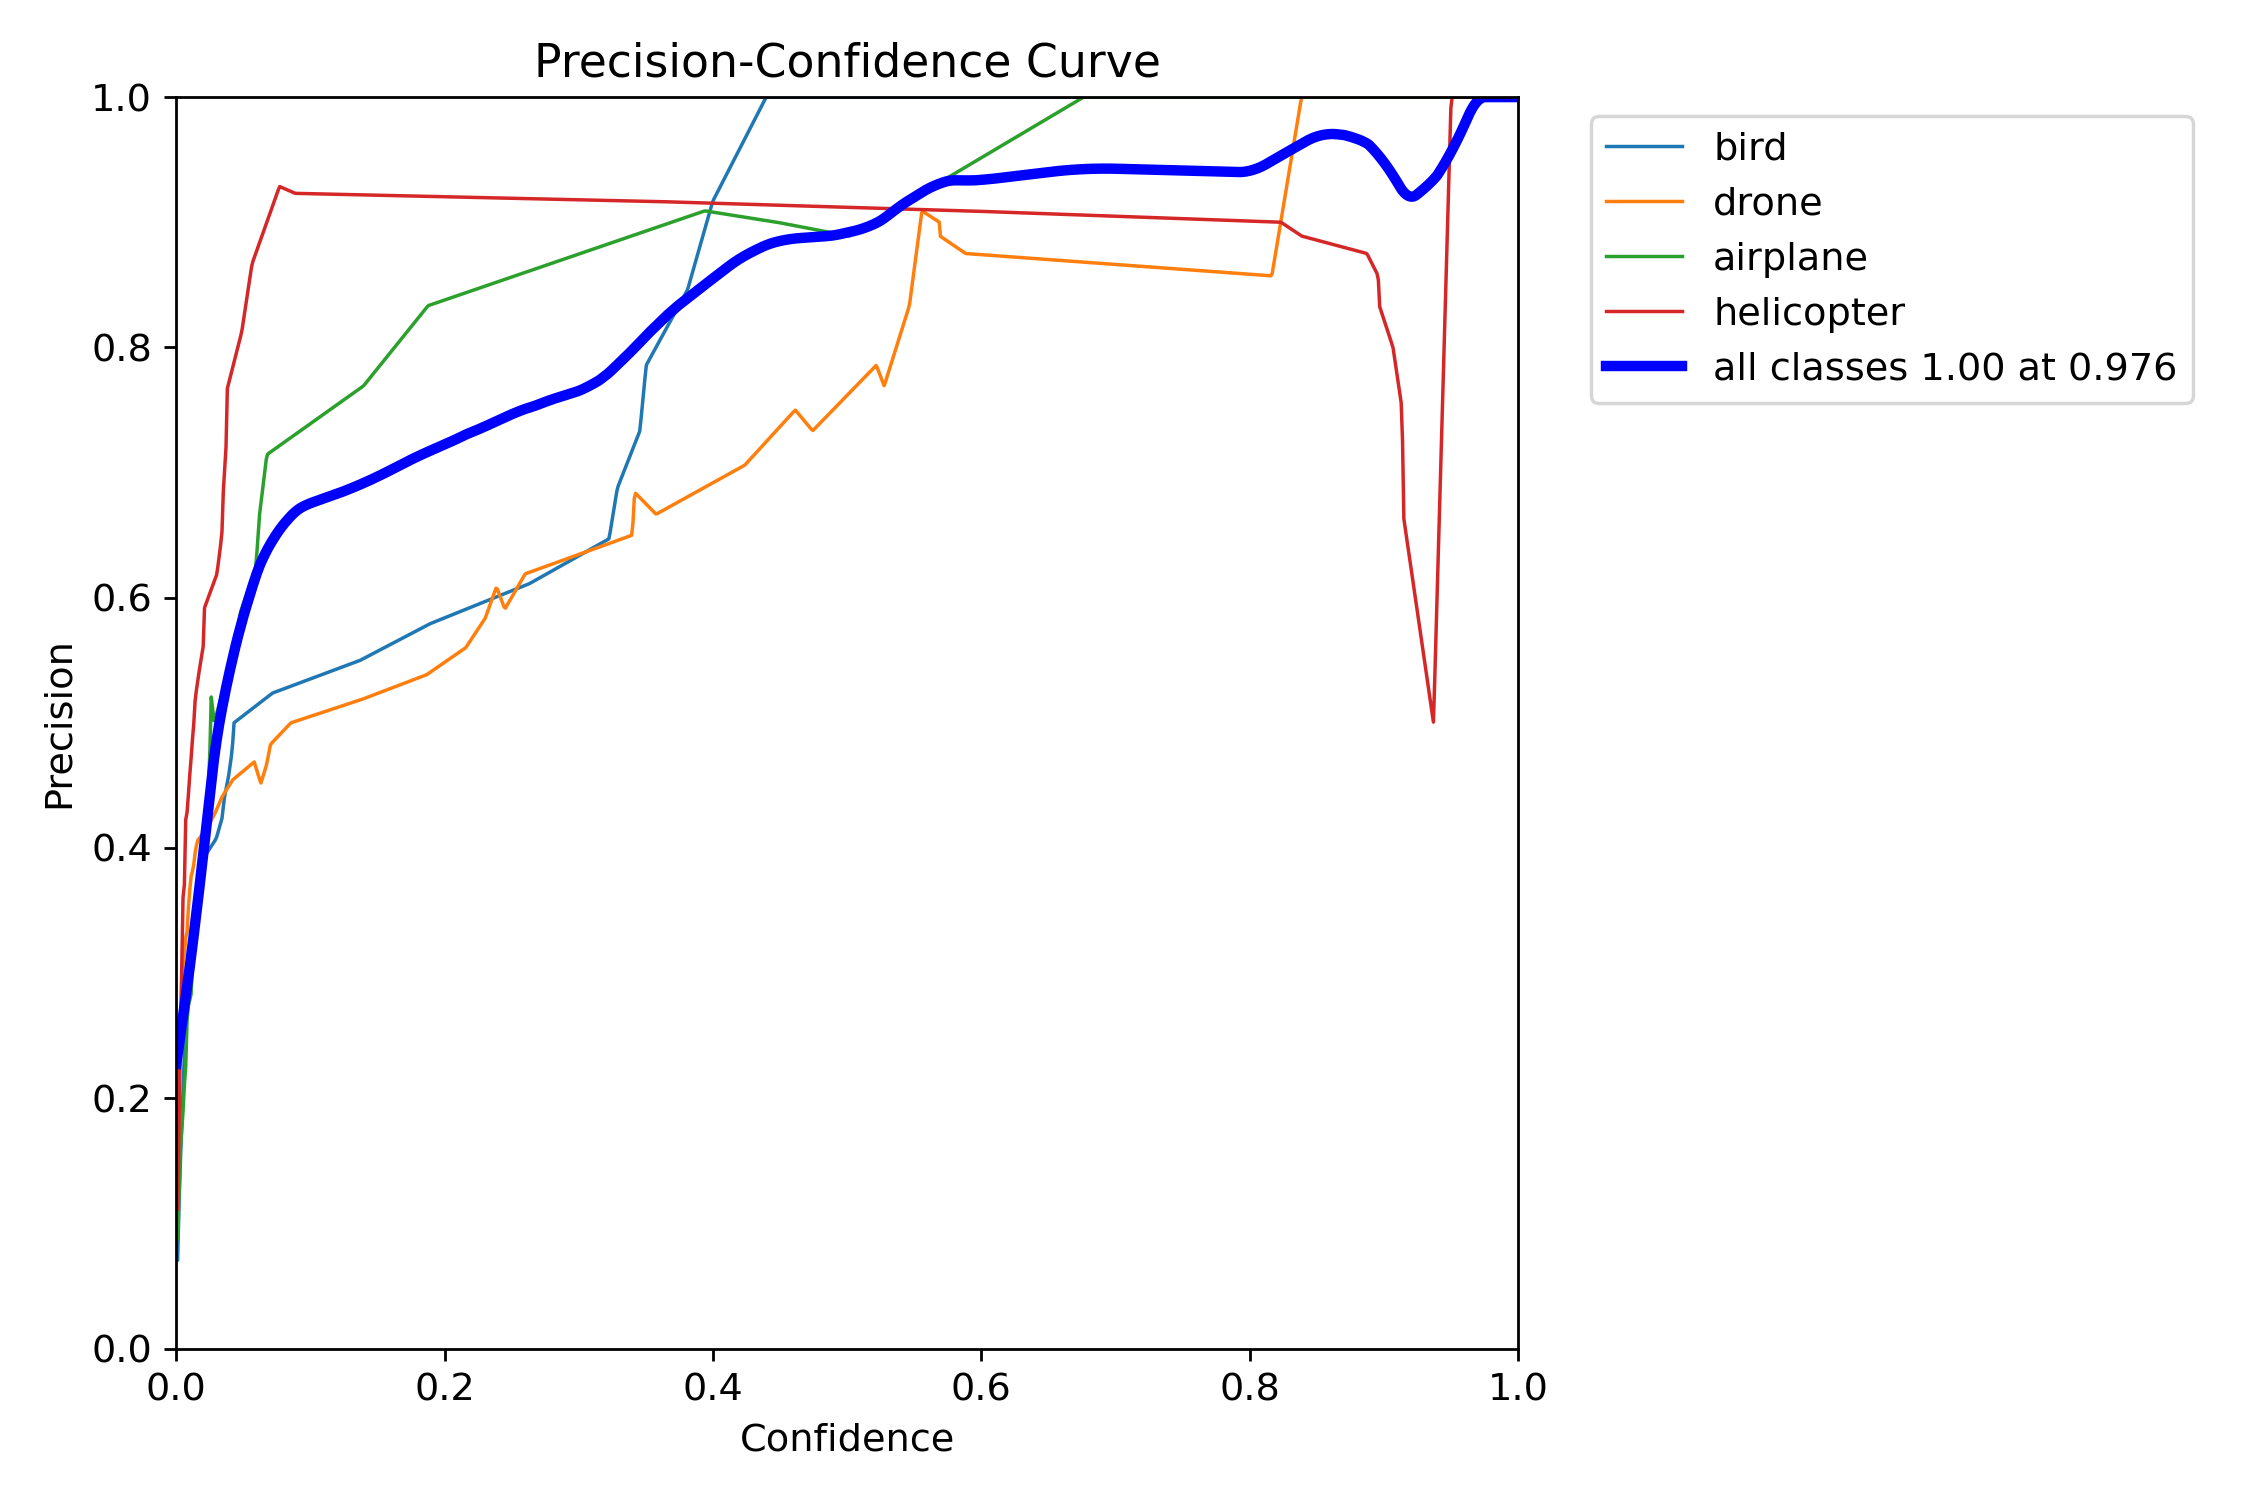

Достижение точности 1.00 при таком высоком пороге уверенности (0.976) подразумевает, что модель действительно хорошо справляется с классификацией объектов.

F1 Score:

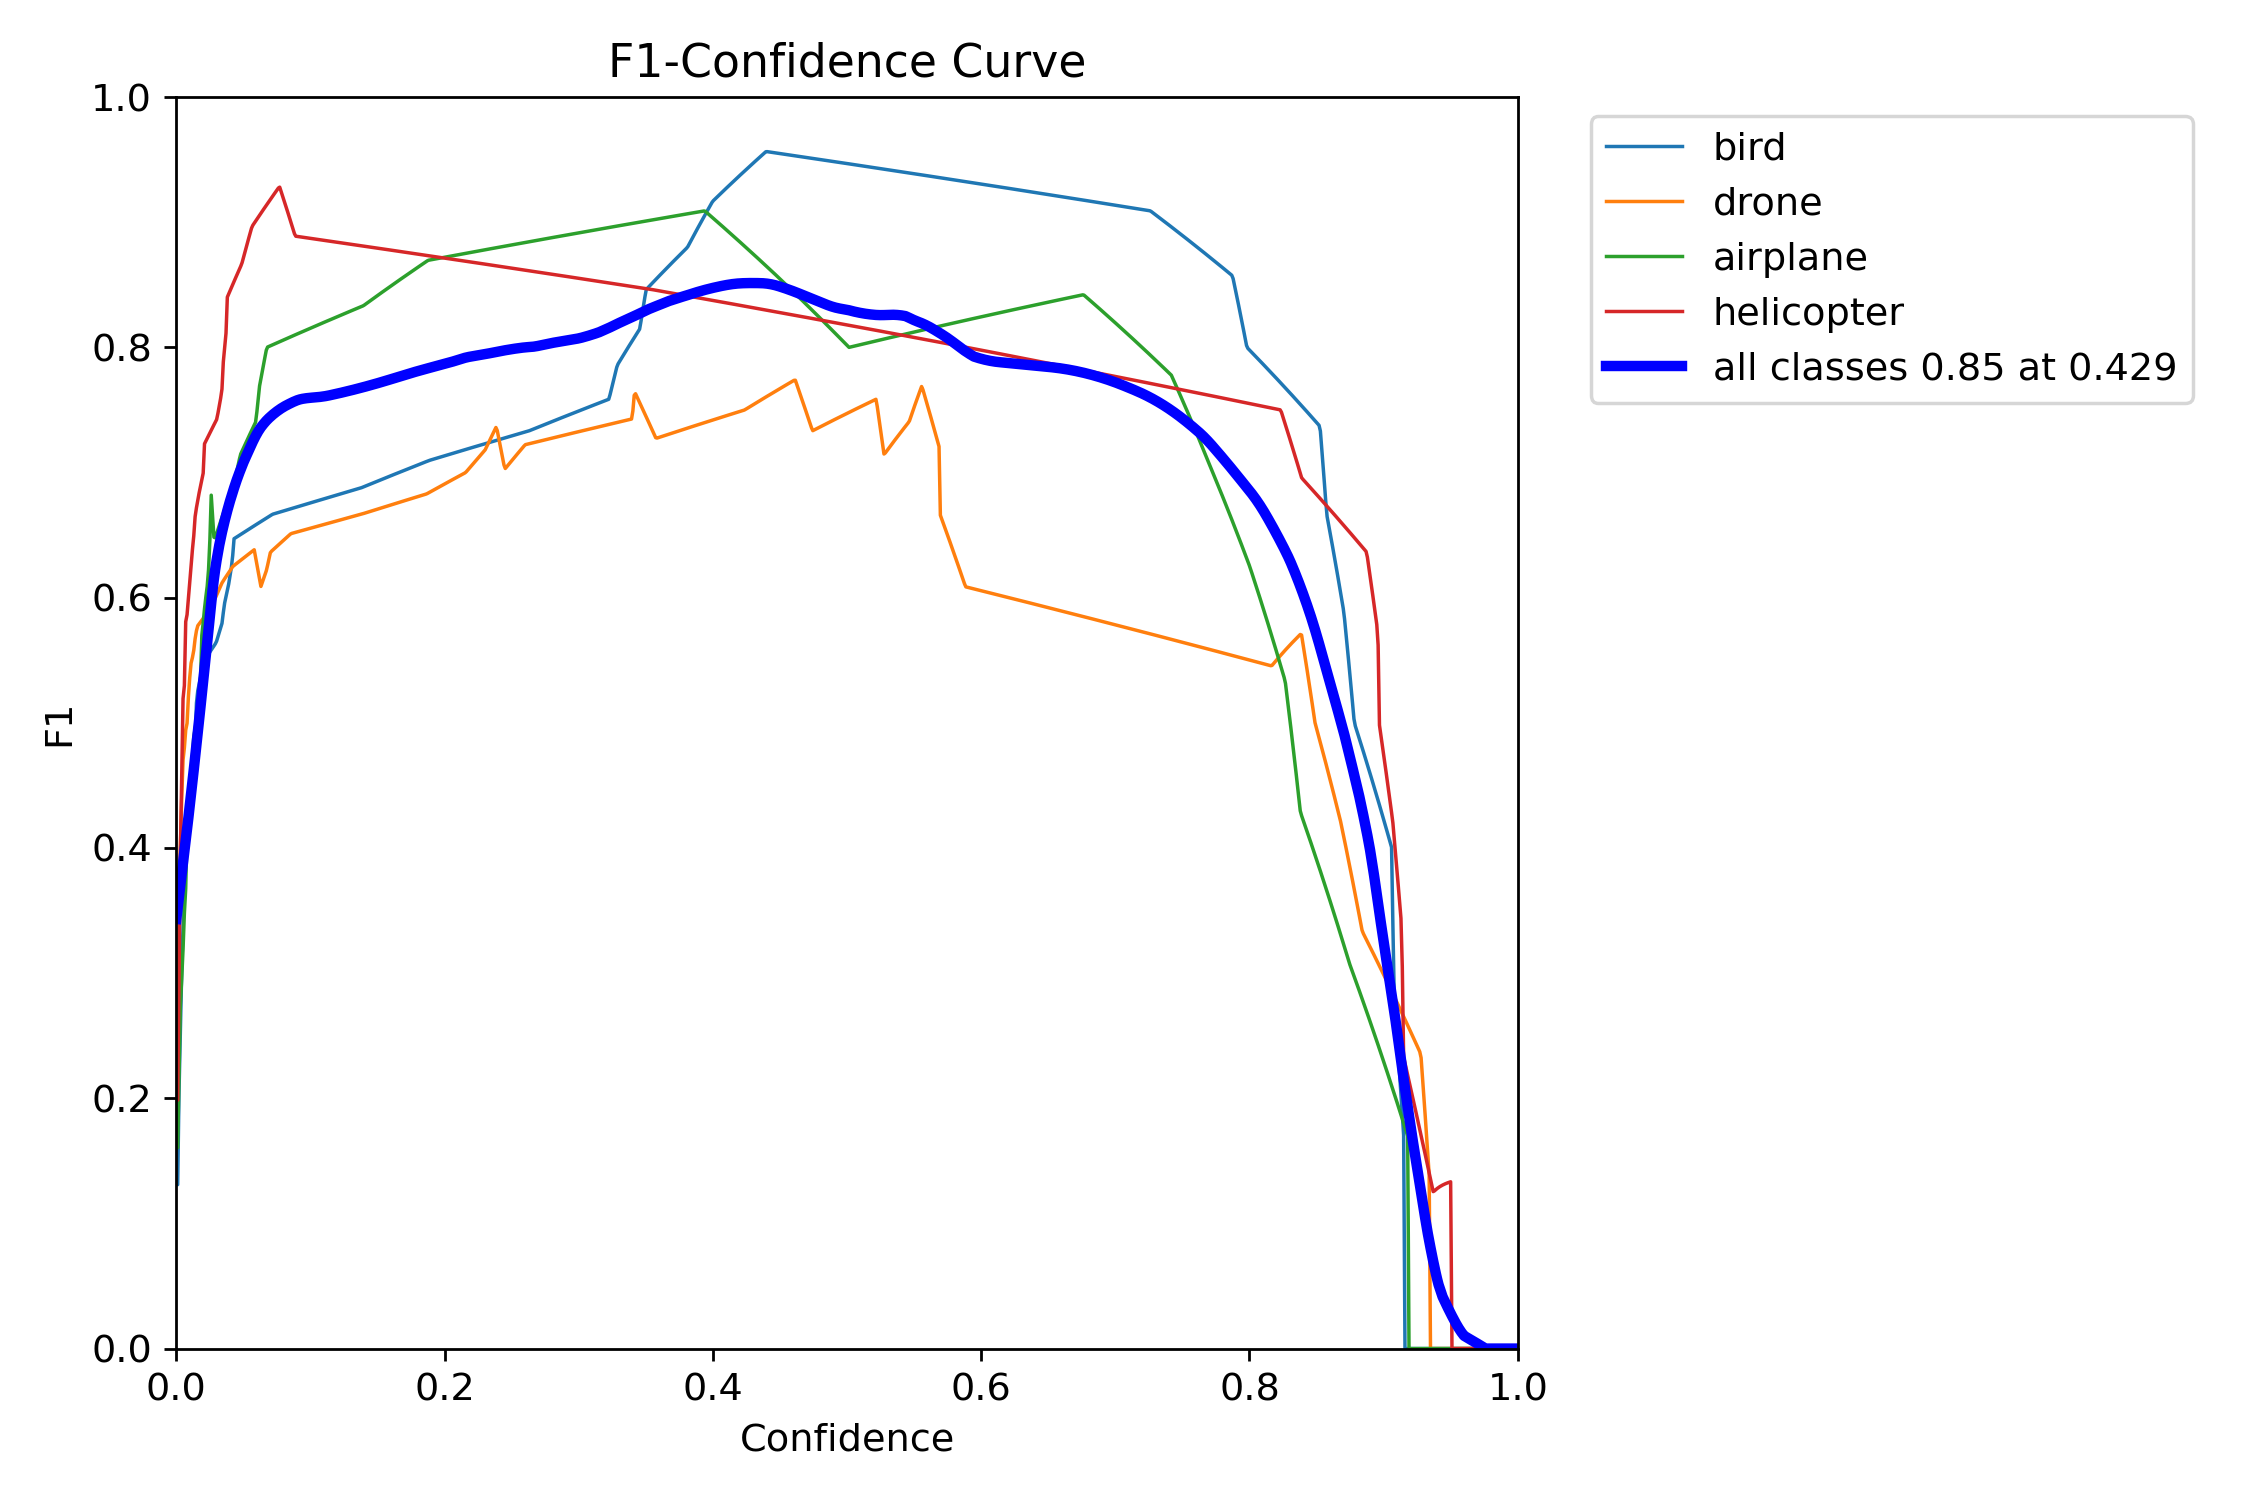

In [ ]:
import pandas as pd
# Создание DataFrame с метриками
data = {
    'Метрика': ['Precision', 'Recall', 'F1'],
    'Значение': [1.00, 0.96, 0.85]
}

df = pd.DataFrame(data)

# Сохранение DataFrame в Excel
df.to_excel('metrics.xlsx', index=False)

print("Таблица успешно сохранена в файл metrics.xlsx")
df

Таблица успешно сохранена в файл metrics.xlsx


,Метрика,Значение
0,Precision,1.00
1,Recall,0.96
2,F1,0.85
